### Student Activity: Beta Comparisons

This program reads in the daily closing prices of social media stocks—FB, TWTR, SNAP—and the S&P 500 as CSVs and calculates the rolling 30-day beta values of each social media to plot the trends in volatility relative to the market.

In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from glob import glob

### Read CSVs in as DataFrames

In [4]:
# # Read the daily closing prices of FB, set the `date` as a datetime index
# fb_data = Path("../Resources/fb_data.csv")
# fb_df = pd.read_csv(fb_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# # Read the daily closing prices of TWTR, set the `date` as a datetime index
# twtr_data = Path("../Resources/twtr_data.csv")
# twtr_df = pd.read_csv(twtr_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# # Read the daily closing prices of SNAP, set the `date` as a datetime index
# snap_data = Path("../Resources/snap_data.csv")
# snap_df = pd.read_csv(snap_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# # Read the daily closing prices of S&P 500, set the `date` as a datetime index
# sp500_data = Path("../Resources/sp500_data.csv")
# sp500_df = pd.read_csv(sp500_data, index_col="date", parse_dates=True, infer_datetime_format=True)
# sp500_df.head()

,close
date,
2014-05-20,1872.829956
2014-05-21,1888.030029
2014-05-22,1892.489990
2014-05-23,1900.530029
2014-05-27,1911.910034


### Combine DataFrames, Sort Index, and Rename Columns

In [2]:
#create dict for loop
def combine(directory):
    df_list = []
    for path in glob(directory + "/*csv"):
        df = pd.read_csv(path, parse_dates=True, index_col='date', names=['date', path.split('/')[-1].split('.')[0].upper()], header=0)
        df_list.append(df)
    return pd.concat(df_list, axis = 'columns', join = 'inner')

combined = combine('../Resources')

In [3]:
returns = combined.pct_change().dropna()
returns.head()

,RESOURCES\FB_DATA,RESOURCES\SNAP_DATA,RESOURCES\SP500_DATA,RESOURCES\TWTR_DATA
date,,,,
2019-05-16,0.009120,-0.006092,0.005872,0.021333
2019-05-15,-0.003850,-0.066550,-0.008817,-0.010444
2019-05-14,-0.029742,-0.015947,-0.005805,-0.025594
2019-05-13,0.004482,-0.036225,-0.007952,-0.009207
2019-05-10,0.037457,0.037587,0.024727,0.050834


In [4]:
beta_dict = {}
for column in returns.columns:
    covarience = returns[column].cov(returns['RESOURCES\SP500_DATA'])
    varience = returns['RESOURCES\SP500_DATA'].var()
    beta_dict[column] = covarience / varience
beta_dict

{'RESOURCES\\FB_DATA': 1.281859508524622,
 'RESOURCES\\SNAP_DATA': 1.1525883660496732,
 'RESOURCES\\SP500_DATA': 1.0000000000000002,
 'RESOURCES\\TWTR_DATA': 1.5193591987729476}

In [5]:
returns.columns = ['FB', 'SNAP', 'SP500', 'TWTR']
returns.head()

,FB,SNAP,SP500,TWTR
date,,,,
2019-05-16,0.009120,-0.006092,0.005872,0.021333
2019-05-15,-0.003850,-0.066550,-0.008817,-0.010444
2019-05-14,-0.029742,-0.015947,-0.005805,-0.025594
2019-05-13,0.004482,-0.036225,-0.007952,-0.009207
2019-05-10,0.037457,0.037587,0.024727,0.050834


In [6]:
beta_dict = {}
for column in returns.columns:
    covarience = returns[column].cov(returns['SP500'])
    varience = returns['SP500'].var()
    beta_dict[column] = covarience / varience
beta_dict

{'FB': 1.281859508524622,
 'SNAP': 1.1525883660496732,
 'SP500': 1.0000000000000002,
 'TWTR': 1.5193591987729476}

In [7]:
# # Create a new pivot table where the columns are the closing prices for each ticker
# combined_df = pd.concat([fb_df, twtr_df, snap_df, sp500_df], axis="columns", join="inner")

# # Sort datetime index in ascending order (past to present)0
# combined_df.sort_index(inplace=True)

# # Set column names to 'AMZN' and 'S&P 500'
# combined_df.columns = ['FB', 'TWTR', "SNAP", "S&P 500"]

# # Display a few rows
# combined_df.head()

In [8]:
def rolling_beta(window=30):
    beta_dict = {}
    for column in returns.columns:
        covarience = returns[column].rolling(window=window).cov(returns['SP500'].rolling(window=window))
        varience = returns['SP500'].rolling(window=window).var()
        beta_dict[column] = covarience / varience
    return beta_dict

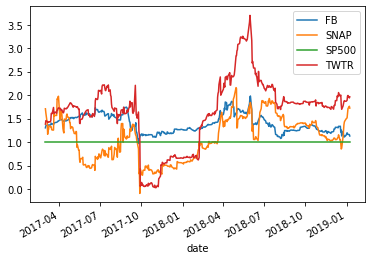

In [9]:
fig, ax = plt.subplots()
beta_dict = rolling_beta(90)
for k, v in beta_dict.items():
    v.plot(ax=ax, label=k)
    plt.legend()

### Calculate Daily Returns

In [ ]:
#STOP Alt..........................

In [6]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns = combined_df.pct_change()
daily_returns.head()

,FB,TWTR,SNAP,S&P 500
date,,,,
2017-03-02,NaN,NaN,NaN,NaN
2017-03-03,0.002998,-0.002533,0.106618,0.000504
2017-03-06,0.001823,-0.012063,-0.122554,-0.003277
2017-03-07,-0.000873,-0.024422,-0.098023,-0.002913
2017-03-08,0.003059,0.003953,0.063899,-0.002284


### Calculate Covariance of Social Media Stock Returns vs. S&P 500 Returns

In [11]:
# Calculate covariance of all daily returns of social media stocks vs. S&P 500
covariance_fb = daily_returns['FB'].cov(daily_returns['S&P 500'])
covariance_twtr = daily_returns['TWTR'].cov(daily_returns['S&P 500'])
covariance_snap = daily_returns['SNAP'].cov(daily_returns['S&P 500'])

covariance_fb
#covariance_twtr
#covariance_snap

8.971694582778613e-05

### Calculate Variance of S&P 500 Returns

In [12]:
# Calculate variance of all daily returns of social media stocks vs. S&P 500
mkt_variance = daily_returns['S&P 500'].var()
mkt_variance

7.000796173303153e-05

### Calculate Beta Values of Social Media Stocks

In [14]:
# Calculate beta of all daily returns of social media stocks
beta_fb = covariance_fb / mkt_variance
beta_twtr = covariance_twtr / mkt_variance
beta_snap = covariance_snap / mkt_variance

print(f'FB: {beta_fb} | TWTR {beta_twtr} | SNAP: {beta_snap}')

FB: 1.2815248952670966 | TWTR 1.509751599647906 | SNAP: 1.1097434117740563


### Calculate 30-Day Rolling Betas of AMZN Returns vs. S&P 500 Returns

In [15]:
# Calculate 30-day rolling covariance of AMZN vs. S&P 500 and plot the data
rolling_fb_covariance = daily_returns['FB'].rolling(window=30).cov(daily_returns['S&P 500'])
rolling_twtr_covariance = daily_returns['TWTR'].rolling(window=30).cov(daily_returns['S&P 500'])
rolling_snap_covariance = daily_returns['SNAP'].rolling(window=30).cov(daily_returns['S&P 500'])

# Calculate 30-day rolling covariance of AMZN vs. S&P 500 and plot the data
rolling_mkt_variance = daily_returns['S&P 500'].rolling(window=30).var()

# Calculate 30-day rolling beta of AMZN and plot the data
rolling_beta_fb = rolling_fb_covariance / rolling_mkt_variance
rolling_beta_twtr = rolling_twtr_covariance / rolling_mkt_variance
rolling_beta_snap = rolling_snap_covariance / rolling_mkt_variance
rolling_beta_snap

date
2017-03-02         NaN
2017-03-03         NaN
2017-03-06         NaN
2017-03-07         NaN
2017-03-08         NaN
                ...   
2019-05-13    2.148242
2019-05-14    2.216199
2019-05-15    2.237961
2019-05-16    2.566093
2019-05-17    2.484245
Length: 557, dtype: float64

### Plot Rolling 30-Day Betas of Social Media Stocks

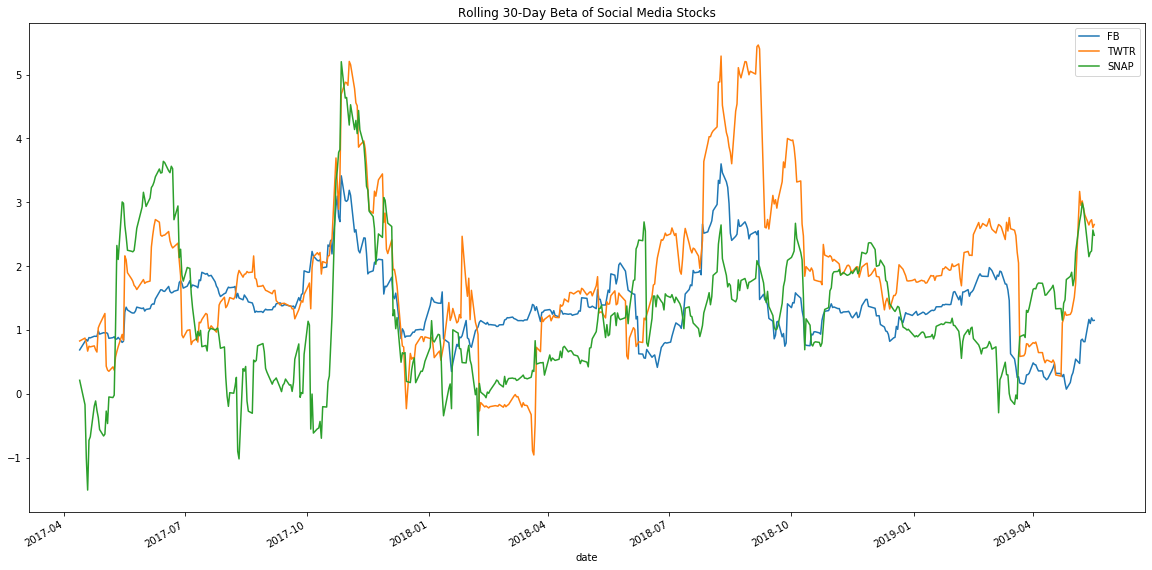

In [16]:
# Set the figure and plot the different datasets as multiple trends on the same figure
ax = rolling_beta_fb.plot(figsize = (20,10), title='Rolling 30-Day Beta of Social Media Stocks')
rolling_beta_twtr.plot(ax=ax)
rolling_beta_snap.plot(ax=ax)

# Set the legend of the figure
ax.legend(['FB', 'TWTR', 'SNAP'])